In [1]:
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import numpy as np

In [2]:
hdu = fits.open('TGSSADR_R46D67_5x5_2.MOSAIC.FITS')

In [3]:
img = hdu[0].data[0][0]
wcs_img = WCS(hdu[0].header)

In [4]:
sigma = img.std()
print(img.max(), img.min(), img.mean(), img.std())

10.104333 -0.024367712 0.00028463817 0.016766516


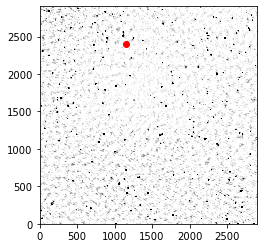

In [5]:
plt.imshow(img, vmin=0, vmax=0.01, cmap='Greys', origin='lower')
plt.scatter([1149], [2395], color='red')

In [6]:
np.unravel_index(img.argmax(), img.shape)

(2395, 1149)

In [7]:
img[2395][1149]

10.104333

In [8]:
print(hdu[0].header)

SIMPLE  =                    T /                                                BITPIX  =                  -32 /                                                NAXIS   =                    4 /                                                NAXIS1  =                 2903 /                                                NAXIS2  =                 2903 /                                                NAXIS3  =                    1 /                                                NAXIS4  =                    1 /                                                EXTEND  =                    T /Tables following main image                     BLOCKED =                    T /Tape may be blocked                             OBJECT  = 'R46D67  '           /Source name                                     TELESCOP= 'GMRT    '           /                                                INSTRUME= '153MHZ  '           /                                                OBSERVER= 'TGSS    '           /        

In [9]:
print(wcs_img)
wcs_img = wcs_img.dropaxis(3)
wcs_img = wcs_img.dropaxis(2)
print(wcs_img)

WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 225.0  58.3933  147500000.0  1.0  
CRPIX : 1451.0  1452.0  1.0  1.0  
NAXIS : 2903  2903  1  1
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 225.0  58.3933  
CRPIX : 1451.0  1452.0  
NAXIS : 2903  2903


In [10]:
position = SkyCoord('15h08m17.96s +57d54m31.7s')
#size = u.Quantity((43.5, 420), u.arcsec)
#position = SkyCoord('15h04m11.96s +60d00m52.7s')
#size = u.Quantity((50*15, 420), u.arcsec)
lower_left = wcs_img.world_to_pixel(SkyCoord('15h08m40s', '+57d52m21s'))
upper_right = wcs_img.world_to_pixel(SkyCoord('15h07m57s', '+57d57m42s'))
#size = (120, 70)
size = np.array(upper_right)-np.array(lower_left)
print(size, type(size))
cutout = Cutout2D(img, position, size, wcs=wcs_img)

[56.80989849 50.04215859] <class 'numpy.ndarray'>


<ipython-input-11-0b8ad396519a>:4: UserWarning: No contour levels were found within the data range.
  plt.contour(cutout.data, levels = [3*sigma+mean, 5*sigma+mean, 7*sigma+mean, 9*sigma+mean])


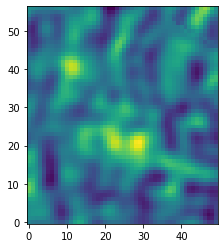

In [11]:
sigma = img.std()
mean = img.mean()
plt.imshow(cutout.data, origin='lower')
plt.contour(cutout.data, levels = [3*sigma+mean, 5*sigma+mean, 7*sigma+mean, 9*sigma+mean])

0.0008522517 0.0044914633


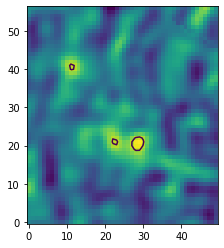

In [12]:
sigma = cutout.data.std()
mean = cutout.data.mean()
print(cutout.data.mean(), cutout.data.std())
plt.imshow(cutout.data, origin='lower')
plt.contour(cutout.data, levels = [3*sigma+mean, 5*sigma+mean, 7*sigma+mean, 9*sigma+mean])

In [13]:
position = SkyCoord('15h08m17.96s +57d54m31.7s')
lower_left = np.array([1304, 512])
upper_right = np.array([1672, 769])
center = lower_left + (upper_right-lower_left)/2
size = upper_right - lower_left
print(center, size)
#size = np.array(upper_right)-np.array(lower_left)
print(size, type(size))
cutout2 = Cutout2D(img, center, size, wcs=wcs_img)

[1488.   640.5] [368 257]
[368 257] <class 'numpy.ndarray'>


0.004403198


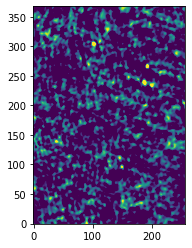

In [14]:
sigma2 = cutout2.data.std()
mean2 = cutout2.data.mean()
plt.imshow(cutout2.data, origin='lower', vmin=0, vmax=3*sigma2)
print(sigma2)

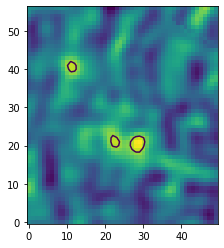

In [15]:
plt.imshow(cutout.data, origin='lower')
plt.contour(cutout.data, levels = [3*sigma2+mean2, 5*sigma2+mean2, 7*sigma2+mean2, 9*sigma2+mean2])

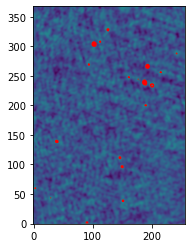

In [16]:
plt.imshow(cutout2.data, origin='lower')
plt.contour(cutout2.data, levels = [3*sigma2, 5*sigma2, 7*sigma2, 9*sigma2], colors='red')

In [17]:
print(img.mean(), mean, mean2)

0.00028463817 0.0008522517 0.0001487268
